In [319]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [320]:
import warnings
warnings.filterwarnings('ignore')

In [321]:
df = pd.read_csv("diabetes.csv")

In [322]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Visualization

In [324]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Pregnancies', ylabel='Density'>

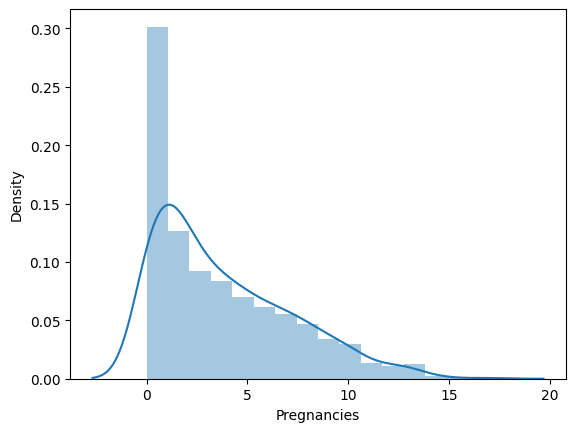

In [325]:
sns.distplot(df['Pregnancies'])

<Axes: xlabel='Glucose', ylabel='Density'>

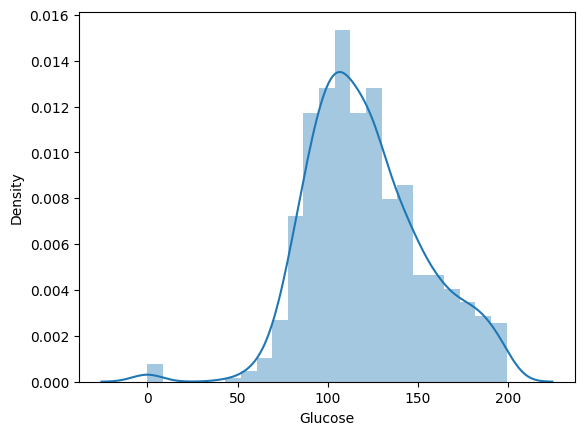

In [326]:
sns.distplot(df['Glucose'])

<Axes: xlabel='BloodPressure', ylabel='Density'>

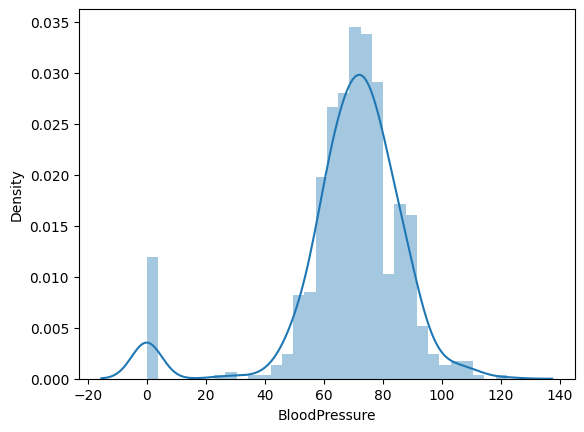

In [327]:
sns.distplot(df['BloodPressure'])

<Axes: xlabel='SkinThickness', ylabel='Density'>

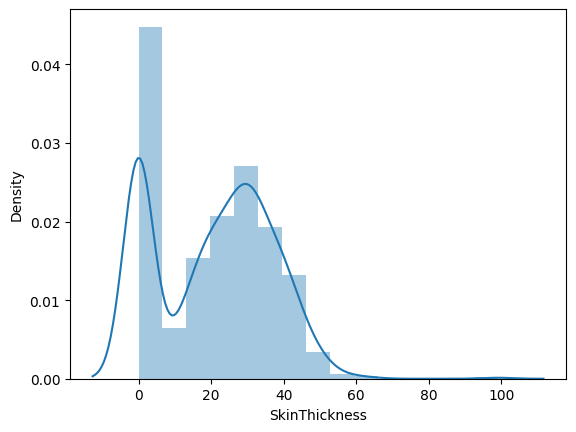

In [328]:
sns.distplot(df['SkinThickness'])

<Axes: xlabel='Insulin', ylabel='Density'>

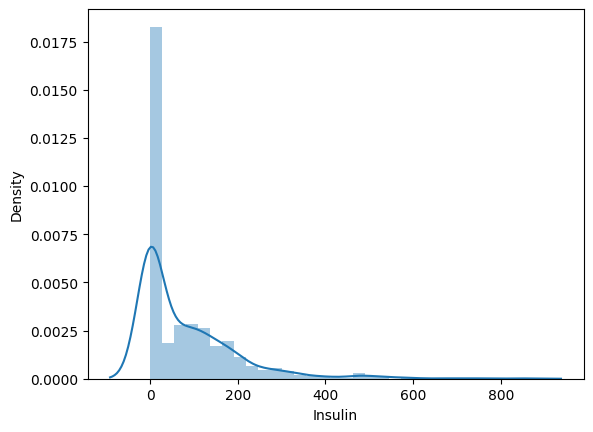

In [329]:
sns.distplot(df['Insulin'])

<Axes: xlabel='BMI', ylabel='Density'>

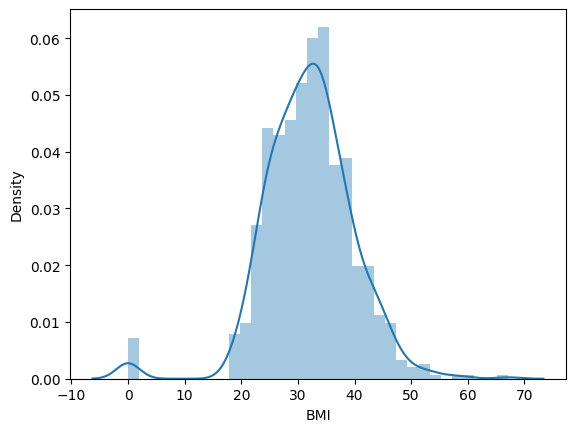

In [330]:
sns.distplot(df['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

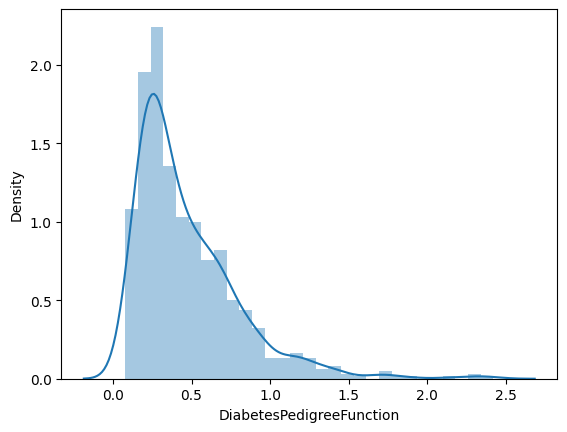

In [331]:
sns.distplot(df['DiabetesPedigreeFunction'])

<Axes: xlabel='Age', ylabel='Density'>

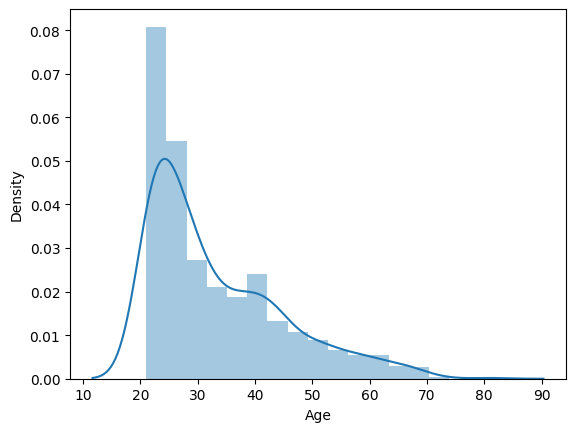

In [332]:
sns.distplot(df['Age'])

# Preprocessing

In [333]:
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 

### Remove suspicious data with zeroes

In [334]:
columns_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace_zeros] = df[columns_to_replace_zeros].replace(0, pd.NA)

# Remove rows with NaN (null) values in any of the selected columns
df = df.dropna(subset=columns_to_replace_zeros)

In [335]:
df.shape

(392, 9)

### Cleaning Outliers for Integer Data Type

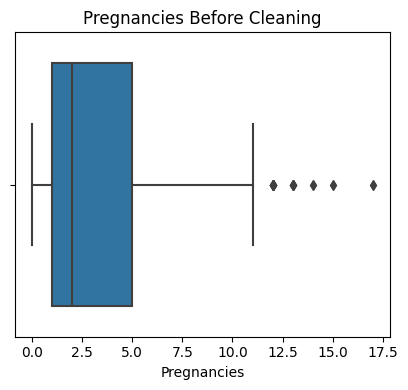

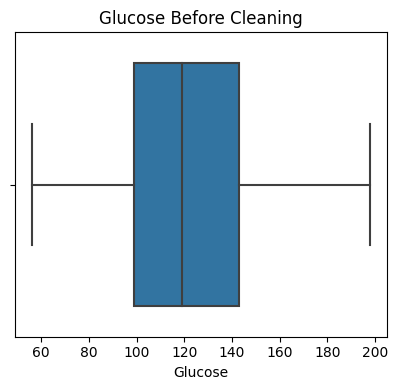

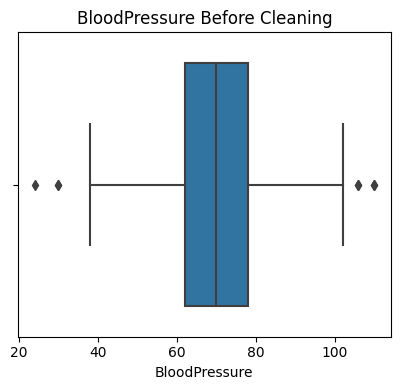

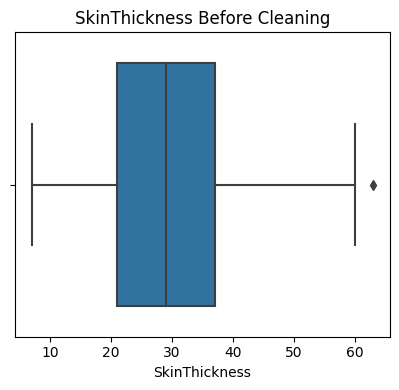

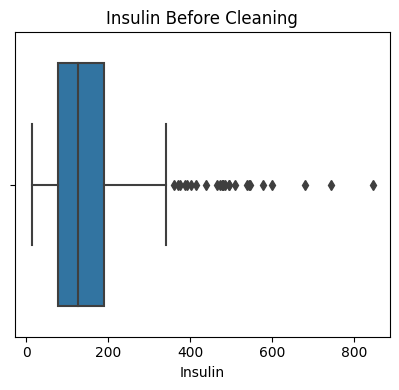

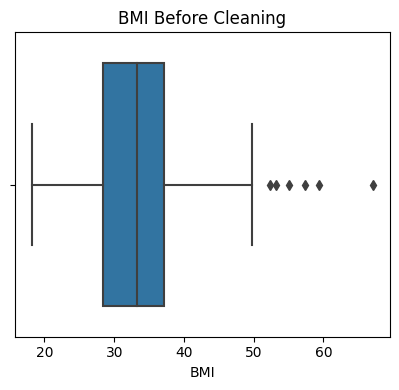

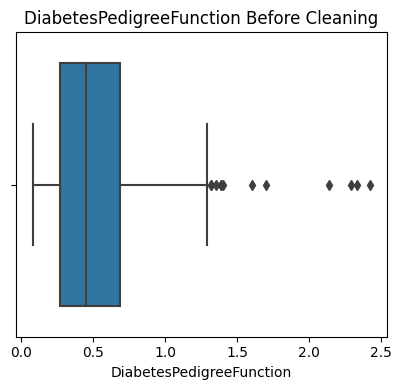

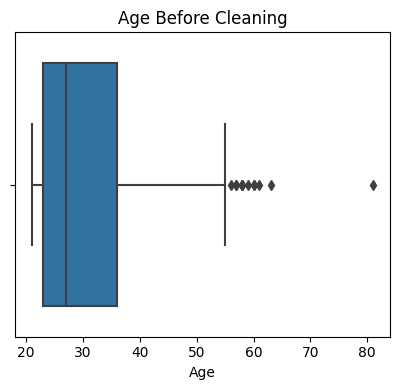

In [336]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column_name])  
    plt.title(f'{column_name} Before Cleaning') 
    
    plt.tight_layout()
    plt.show()

In [337]:
df.shape

(392, 9)

In [338]:

# Loop through the columns and apply the IQR-based outlier detection and removal
for column_name in columns_to_check:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column_name] >= Q1 - 1.5*IQR) & (df[column_name] <= Q3 + 1.5*IQR)]

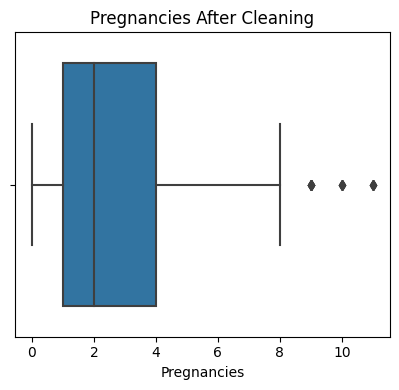

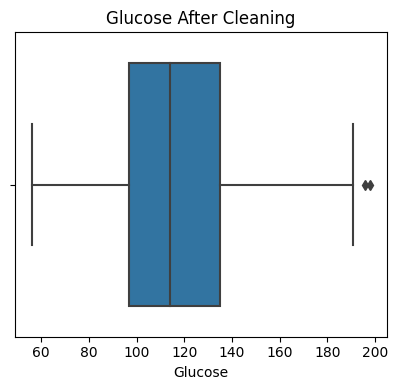

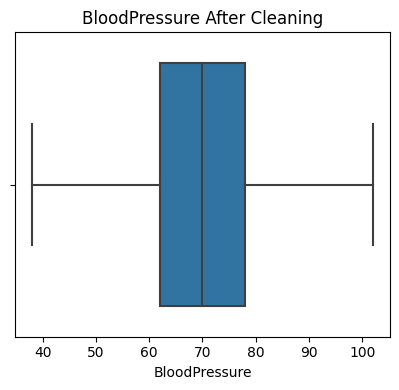

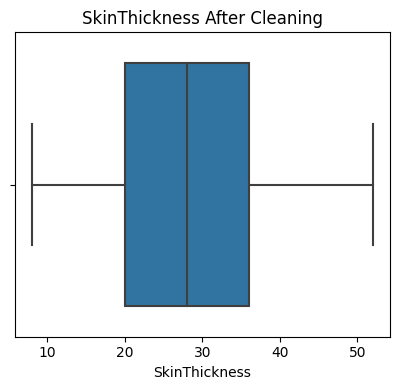

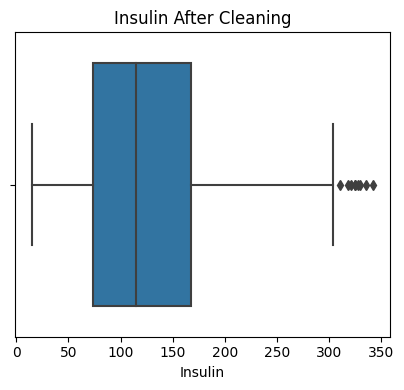

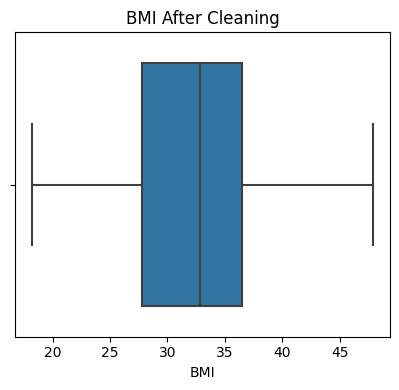

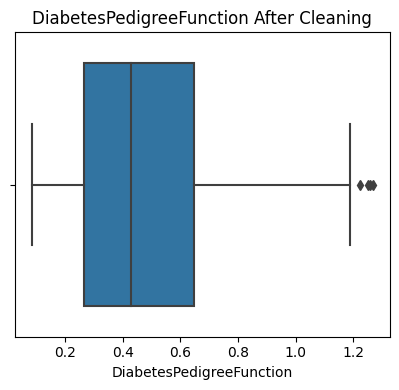

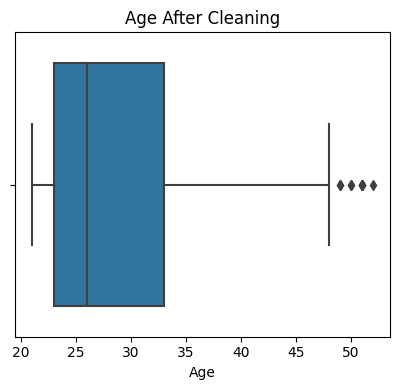

In [339]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column_name])  
    plt.title(f'{column_name} After Cleaning') 
    plt.tight_layout()
    plt.show()

In [340]:
df.shape

(321, 9)

# Training and Test Split

In [341]:
from sklearn.model_selection import train_test_split

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing the Values

In [342]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5, 
                                                                  min_samples_split=2, 
                                                                  min_samples_leaf=2)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=0)

In [343]:
y_preds = clf.predict(X_test)

In [344]:
X_test.shape

(65, 8)

In [345]:
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

Accuracy 0.7077
Precision 0.5789
Recall 0.5000
F1 0.5366


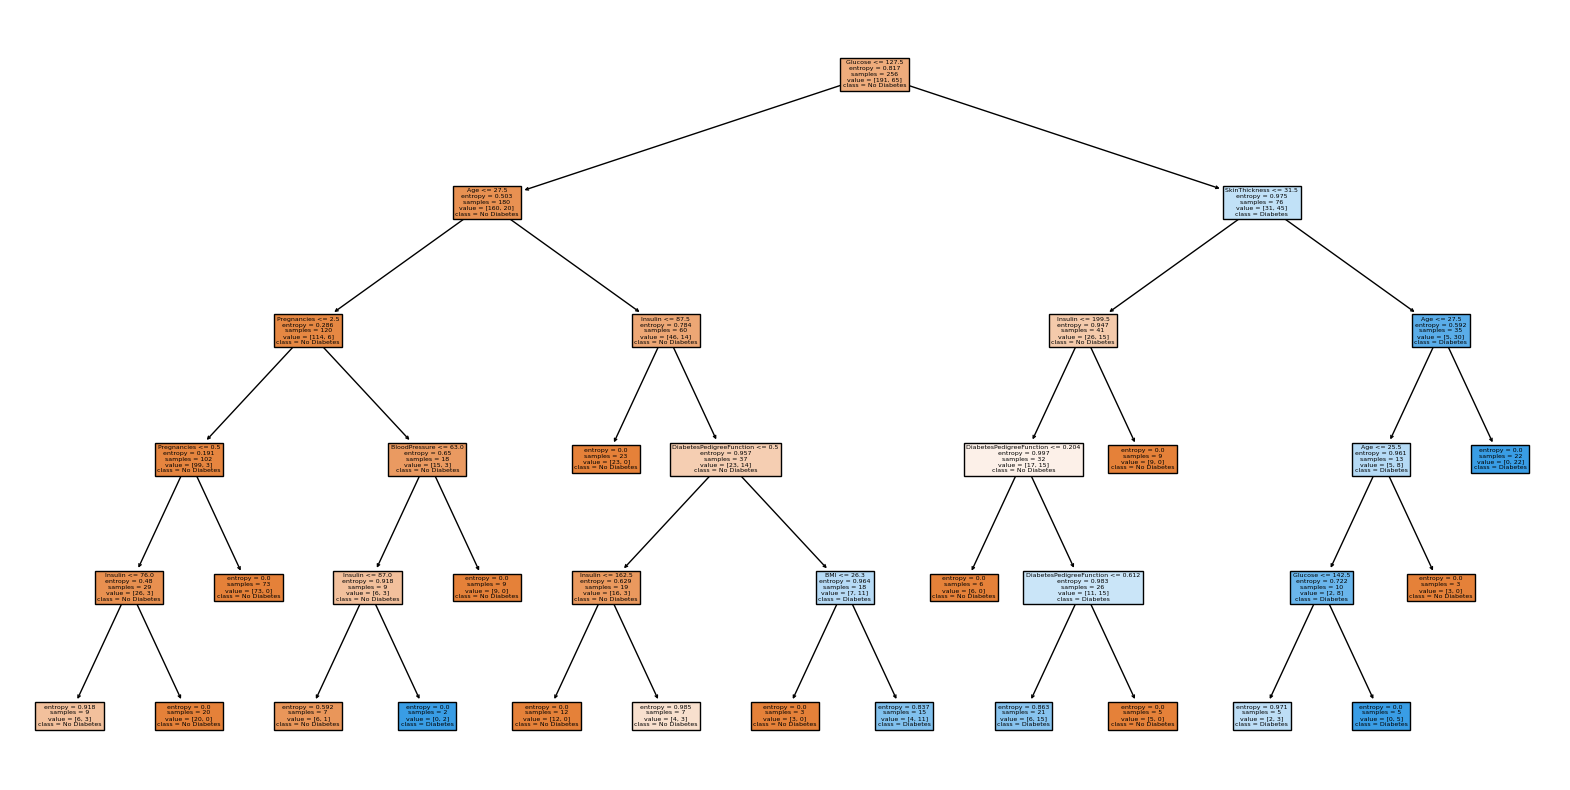

In [346]:
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=list(X.columns),
          class_names=['No Diabetes', 'Diabetes'],
          filled=True)

plt.savefig('decision_tree_plot.png')